In [11]:
import atomai as aoi
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy as dc
import torch
from skimage import io
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [9]:

X_train = np.load('../../cropped_images_new.npy')
y_train = np.load('../../cropped_masks_new.npy')
print(X_train.shape, y_train.shape)

(6046, 256, 256) (6046, 256, 256)


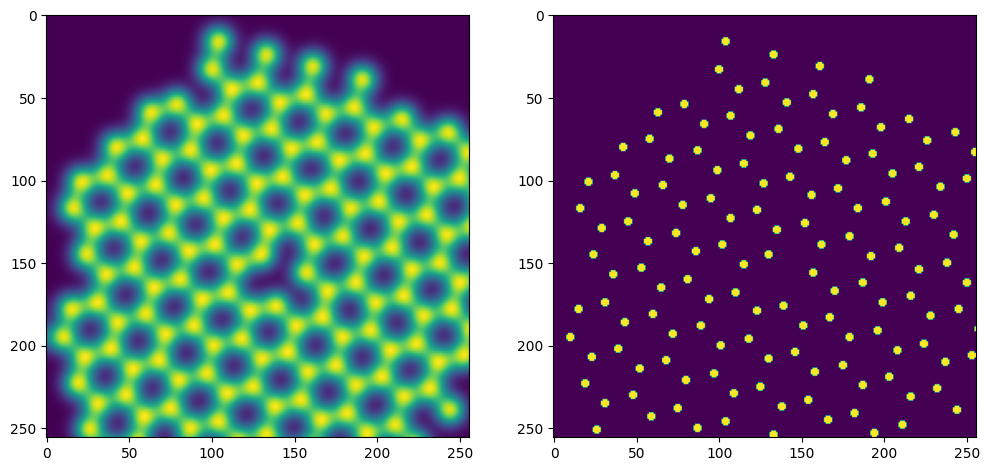

In [12]:

k = 35

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(X_train[k])
ax2.imshow(y_train[k])

In [13]:

dt = aoi.transforms.datatransform(1, # number of classes
                                  gauss_noise=[2000, 3000], # scaled values
                                  poisson_noise=[30, 45],
                                  blur=False,
                                  contrast=True,
                                  zoom=True,
                                  resize=[2, 1], # downsize all the images by a factor of 2
                                  seed=1)

X_train, y_train = dt.run(X_train, y_train[..., None])

(-0.5, 135.5, 135.5, -0.5)

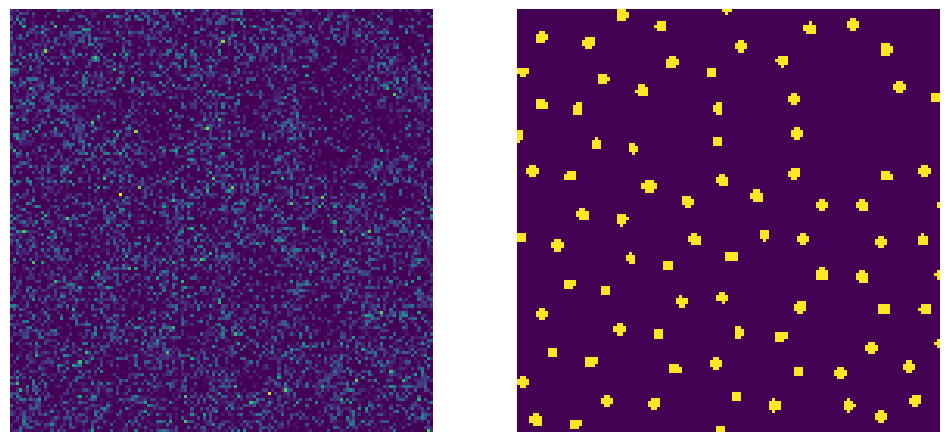

In [14]:
k = 2104

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(X_train[k,0])
ax2.imshow(y_train[k,0])
ax1.axis('off')
ax2.axis('off')

In [15]:

train_new = True

if train_new:
    etrainer = aoi.atomnet.ensemble_trainer(
        #images, masks, # training/test split is done automatically inside the trainer
        model='dilUnet', nb_filters=64, layers=[2, 3, 3, 4], # model specs
        with_dilation=False, use_batchnorm=True, upsampling="bilinear", # model specs
        n_models=20, strategy="from_scratch",# ensemble specs
        batch_size=8, training_cycles_base=2000, swa=True, # training specs
        filename="graphene_md_dilUnet2_ensemble.tar") # savename - adjsut appropriately

    ensemble, smodel = etrainer.run()

else:
    !gdown https://drive.google.com/uc?id=144GFPptAphHlUOVgRX7_ZeNIPjXcVyKb
    smodel, ensemble = aoi.load_ensemble("graphene_md_dilUnet2_ensemble.tar")
     

AttributeError: module 'atomai' has no attribute 'atomnet'